In [2]:
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph

# 8 Communication

There are theories of communication which can be broken down into two sets - *informational* and *motivational*. The former is about how beliefs change in light of new information, with agents simply informing eachother. The latter is about agents with different aims and why they might communicate for strategic reasons. There are 3 main strains of this:
1. Cheap talk. This is about costless communication prior to a game. Sometimes it changes things, sometimes not. Broadly doing by talking.
2. Signalling games. This is about actions which communicate to another agent something new. More like talking by doing.
3. Speech-act theory. Pragmatic ways in which language is used in cooperative situations. Doing by talking again.

## 8.1 "Doing by talking" I: cheap talk

Consider the Prisoner's Dilemma:

$
\begin{array}{c|cc}
\text{} & \text{C} & \text{D} \\
\hline
\text{C} & 3,3 & 0,4 \\
\text{D} & 4,0 & 1,1 \\
\end{array}
$

Does communication before the game change things? Well, no. Regardless of what both players say, they will each still choose to defect. Any talk about cooperating is cheap and non-credible. But consider the below coordination game instead:

$
\begin{array}{c|cc}
\text{} & \text{A} & \text{B} \\
\hline
\text{A} & 1,1 & 0,0 \\
\text{B} & 0,0 & 1,1 \\
\end{array}
$

If the row player says they will go A, column should probably assume this is correct! If the row player was actually going to go B there would be no reason to tell column to go A. The comment by row is both self-committing and self-revealing in that once it has been said it is optimal to follow through on it, and it wouldn't have been said if it wasn't expected to be believed. There is a subtelty here in that sending the opposite message could also be optimal, so long as the other player was expected to take the opposite view of it...

Giotto's thought: In truth, communication is probably only an applicable concept in some kind of repeated-game. If agents can communicate and choose whether to believe communications there is probably an equilibrium at (communicate accurately, believe communications).

Communication by necessity means we need to consider the game in sequential-form. Imagine a single game where one player first gets to communicate their strategy:

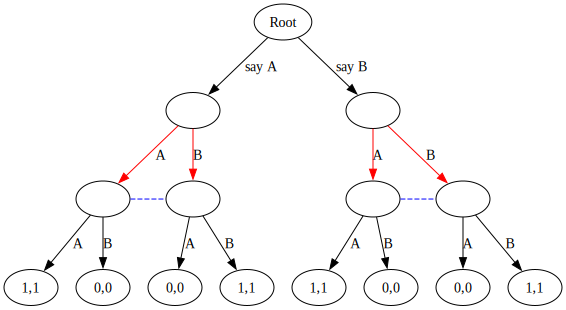

In [25]:
graph1 = Digraph()
graph1.node('root', 'Root')
graph1.node('p1_left', '')
graph1.node('p1_right', '')
graph1.edge('root', 'p1_left', 'say A', color="black")
graph1.edge('root', 'p1_right', 'say B', color="black")
with graph1.subgraph() as same_rank:
    same_rank.attr(rank='same')
    same_rank.node('p1_left')
    same_rank.node('p1_right')
graph1.node('p2_left_after_left', '')
graph1.node('p2_right_after_left', '')
graph1.edge('p1_left', 'p2_left_after_left', 'A', color="red")
graph1.edge('p1_left', 'p2_right_after_left', 'B', color="red")
graph1.node('p2_left_after_right', '')
graph1.node('p2_right_after_right', '')
graph1.edge('p1_right', 'p2_left_after_right', 'A', color="red")
graph1.edge('p1_right', 'p2_right_after_right', 'B', color="red")
graph1.edge('p2_left_after_left', 'p2_right_after_left', '', color="blue", style="dashed", dir="none")
graph1.edge('p2_left_after_right', 'p2_right_after_right', '', color="blue", style="dashed", dir="none")
with graph1.subgraph() as same_rank:
    same_rank.attr(rank='same')
    same_rank.node('p2_left_after_left')
    same_rank.node('p2_right_after_left')
    same_rank.node('p2_left_after_right')
    same_rank.node('p2_right_after_right')
graph1.node('outcome_LL_A', '1,1')
graph1.node('outcome_LL_B', '0,0')
graph1.edge('p2_left_after_left', 'outcome_LL_A', 'A', color="black")
graph1.edge('p2_left_after_left', 'outcome_LL_B', 'B', color="black")
graph1.node('outcome_LR_A', '0,0')
graph1.node('outcome_LR_B', '1,1')
graph1.edge('p2_right_after_left', 'outcome_LR_A', 'A', color="black")
graph1.edge('p2_right_after_left', 'outcome_LR_B', 'B', color="black")
graph1.node('outcome_RL_A', '1,1')
graph1.node('outcome_RL_B', '0,0')
graph1.edge('p2_left_after_right', 'outcome_RL_A', 'A', color="black")
graph1.edge('p2_left_after_right', 'outcome_RL_B', 'B', color="black")
graph1.node('outcome_RR_A', '0,0')
graph1.node('outcome_RR_B', '1,1')
graph1.edge('p2_right_after_right', 'outcome_RR_A', 'A', color="black")
graph1.edge('p2_right_after_right', 'outcome_RR_B', 'B', color="black")
display(graph1)

In this game at both branches the subgame is the same coordination problem, the communication doesn't help for a single game. Even if we change the options to 'follow' and 'don't follow' we still have the same problem!

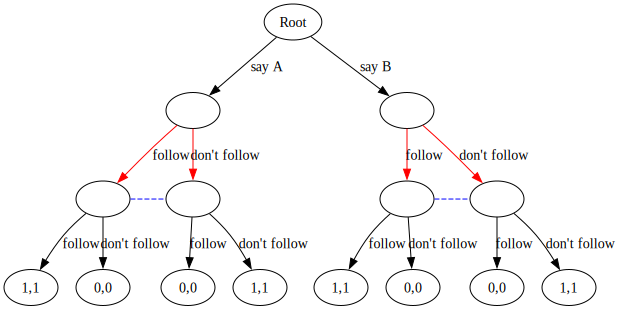

In [30]:
graph2 = Digraph()
graph2.node('root', 'Root')
graph2.node('p1_left', '')
graph2.node('p1_right', '')
graph2.edge('root', 'p1_left', 'say A', color="black")
graph2.edge('root', 'p1_right', 'say B', color="black")
with graph2.subgraph() as same_rank:
    same_rank.attr(rank='same')
    same_rank.node('p1_left')
    same_rank.node('p1_right')
graph2.node('p2_left_after_left', '')
graph2.node('p2_right_after_left', '')
graph2.edge('p1_left', 'p2_left_after_left', 'follow', color="red")
graph2.edge('p1_left', 'p2_right_after_left', "don't follow", color="red")
graph2.node('p2_left_after_right', '')
graph2.node('p2_right_after_right', '')
graph2.edge('p1_right', 'p2_left_after_right', 'follow', color="red")
graph2.edge('p1_right', 'p2_right_after_right', "don't follow", color="red")
graph2.edge('p2_left_after_left', 'p2_right_after_left', '', color="blue", style="dashed", dir="none")
graph2.edge('p2_left_after_right', 'p2_right_after_right', '', color="blue", style="dashed", dir="none")
with graph2.subgraph() as same_rank:
    same_rank.attr(rank='same')
    same_rank.node('p2_left_after_left')
    same_rank.node('p2_right_after_left')
    same_rank.node('p2_left_after_right')
    same_rank.node('p2_right_after_right')
graph2.node('outcome_LL_A', '1,1')
graph2.node('outcome_LL_B', '0,0')
graph2.edge('p2_left_after_left', 'outcome_LL_A', 'follow', color="black")
graph2.edge('p2_left_after_left', 'outcome_LL_B', "don't follow", color="black")
graph2.node('outcome_LR_A', '0,0')
graph2.node('outcome_LR_B', '1,1')
graph2.edge('p2_right_after_left', 'outcome_LR_A', 'follow', color="black")
graph2.edge('p2_right_after_left', 'outcome_LR_B', "don't follow", color="black")
graph2.node('outcome_RL_A', '1,1')
graph2.node('outcome_RL_B', '0,0')
graph2.edge('p2_left_after_right', 'outcome_RL_A', 'follow', color="black")
graph2.edge('p2_left_after_right', 'outcome_RL_B', "don't follow", color="black")
graph2.node('outcome_RR_A', '0,0')
graph2.node('outcome_RR_B', '1,1')
graph2.edge('p2_right_after_right', 'outcome_RR_A', 'follow', color="black")
graph2.edge('p2_right_after_right', 'outcome_RR_B', "don't follow", color="black")
display(graph2)

You can see that doing the opposite of what was said is an equilibrium too... How confusing! I supose if saying you will do A you can reasonably expect to slightly alter the *beliefs* of the other player, making them think you will go A, then the natural unwinding of the end results will tell you to commit to A, and them to do the same. However, this feels flakey! At the end of the day stating what I will do only works if it will impact what the other player *believes* I will do.